In [1]:
import pandas as pd
import networkx as nx
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
teams_df = pd.read_csv("cfb22.csv")
stats_df = teams_df[['Team','Off TDs', 'Total TDs Allowed']]
stats_df

,Team,Off TDs,Total TDs Allowed
0,Tennessee (SEC),78,37
1,Washington (Pac-12),65,42
2,Southern California (Pac-12),73,54
3,UCLA (Pac-12),65,45
4,Georgia (SEC),75,23
...,...,...,...
126,Rutgers (Big Ten),22,45
127,Colorado (Pac-12),21,72
128,Massachusetts (FBS Independent),14,48
129,Iowa (Big Ten),19,18


In [3]:
scaler = MinMaxScaler()
cols_to_normalize = [col for col in stats_df.columns if pd.api.types.is_numeric_dtype(teams_df[col])]
df_normalized = pd.DataFrame(stats_df[cols_to_normalize])
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])
df_normalized = pd.concat([df_normalized, stats_df.drop(columns=cols_to_normalize)], axis=1)
df_normalized.head()

,Off TDs,Total TDs Allowed,Team
0,1.000000,0.375000,Tennessee (SEC)
1,0.796875,0.464286,Washington (Pac-12)
2,0.921875,0.678571,Southern California (Pac-12)
3,0.796875,0.517857,UCLA (Pac-12)
4,0.953125,0.125000,Georgia (SEC)


<AxesSubplot:xlabel='Off TDs', ylabel='Total TDs Allowed'>

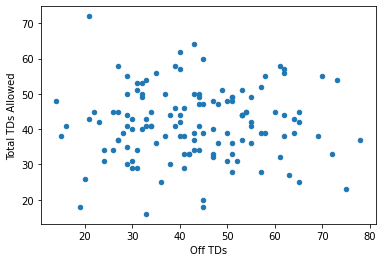

In [4]:
teams_df.plot.scatter(x='Off TDs',y='Total TDs Allowed')

In [5]:
cosine_similarities = cosine_similarity(df_normalized[df_normalized['Team'] != 'Georgia (SEC)'][['Off TDs', 'Total TDs Allowed']],
                                        df_normalized[df_normalized['Team'] == 'Georgia (SEC)'][['Off TDs', 'Total TDs Allowed']])

georgia_similarities = {}
for i, Team in enumerate(df_normalized[df_normalized['Team'] != 'Georgia (SEC)']['Team']):
    georgia_similarities[Team] = cosine_similarities[i][0]

ordered_similarities = {k: v for k, v in sorted(georgia_similarities.items(), key=lambda item: item[1], reverse=True)}

print("Cosine similarity scores of every team compared to Georgia Bulldogs:")
for team, similarity_score in ordered_similarities.items():
    print(team, similarity_score)

Cosine similarity scores of every team compared to Georgia Bulldogs:
Air Force (Mountain West) 0.9998718917777254
Minnesota (Big Ten) 0.9983870995526907
Michigan (Big Ten) 0.9976474106974806
Alabama (SEC) 0.9927198178627485
Illinois (Big Ten) 0.9915095306014198
Penn St. (Big Ten) 0.9841404188569945
Ohio St. (Big Ten) 0.9814669154492633
James Madison (Sun Belt) 0.9748935552886129
Tennessee (SEC) 0.9740373018648097
Florida St. (ACC) 0.9711869209146801
Oregon St. (Pac-12) 0.9572695374941281
Utah (Pac-12) 0.9558155303487481
Iowa (Big Ten) 0.9558155303487481
Marshall (Sun Belt) 0.9532642256601885
Fresno St. (Mountain West) 0.9511008082320438
LSU (SEC) 0.9386471123580968
Texas (Big 12) 0.9382985228016908
Tulane (AAC) 0.9381309916908275
Troy (Sun Belt) 0.9313683444277959
South Alabama (Sun Belt) 0.9302906805080302
Clemson (ACC) 0.9293406929094588
Washington (Pac-12) 0.9221676772066265
Boise St. (Mountain West) 0.9203980253165951
Western Ky. (C-USA) 0.9178748781467139
UCF (AAC) 0.9137887475977